# GradientBoostingMachines (GBM) Regresyon Modeli Kuralım. Üzerinde çalışacağımız veri setinde hız ve yakıt verimliliği isminde 2 değişken olacak. Hıza bağlı olarak yakıt verimliliğini tahmin etmek istediğimizi düşünelim.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
# Veri setini oluşturalım.
np.random.seed(42)

speed = np.random.uniform(low=50, high=200, size=100)
fuel_efficiency = 3000 / speed + np.random.normal(loc=0, scale=5, size=100)

data = pd.DataFrame({
    'Speed': speed,
    'Fuel Efficiency': fuel_efficiency
})
data.head()

,Speed,Fuel Efficiency
0,106.181018,28.688873
1,192.607146,14.080709
2,159.799091,19.232377
3,139.798773,11.521571
4,73.402796,39.772018


# Veri Analizi

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed,100.0,120.527112,44.623412,50.828318,78.980114,119.621368,159.530468,198.033040
Fuel Efficiency,100.0,29.087899,13.818648,5.803013,18.286927,25.182637,39.240873,61.631925


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Speed            100 non-null    float64
 1   Fuel Efficiency  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [31]:
data.var()

Speed              1991.248867
Fuel Efficiency     190.955020
dtype: float64

In [32]:
data.corr()

,Speed,Fuel Efficiency
Speed,1.000000,-0.879232
Fuel Efficiency,-0.879232,1.000000


In [33]:
data.isnull().any()

Speed              False
Fuel Efficiency    False
dtype: bool

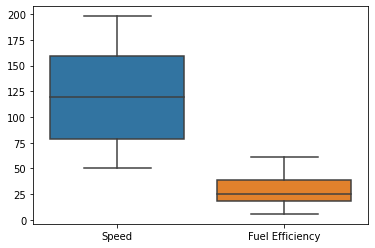

In [34]:
sns.boxplot(data=data);

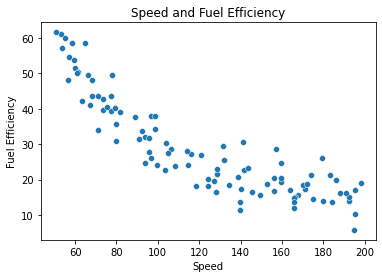

In [35]:
sns.scatterplot(data=data, x='Speed', y='Fuel Efficiency')
plt.title('Speed and Fuel Efficiency')
plt.xlabel('Speed')
plt.ylabel('Fuel Efficiency')
plt.show()

# Model 

In [36]:
# Bağımlı ve bağımsız değişkenleri oluşturalım.
X = data['Speed'].values.reshape(-1, 1)
y = data['Fuel Efficiency']

In [37]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Modeli oluşturalım ve eğitelim.

model = GradientBoostingRegressor().fit(X_train, y_train)

In [39]:
# Tahmin yapalım.

predict = model.predict(X_test)

In [40]:
# Modeli değerlendirelim.

r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.9190607927644362
MSE:  17.05811994515367
RMSE:  4.130147690477142


# Model Tuning

In [41]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

print('Best Params: ', best_params)
print('Best Score: ', best_score)

Best Params:  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score:  0.7940036549715173


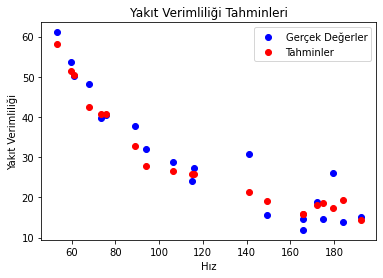

In [42]:
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')
plt.scatter(X_test, predict, color='red', label='Tahminler')
plt.title('Yakıt Verimliliği Tahminleri')
plt.xlabel('Hız')
plt.ylabel('Yakıt Verimliliği')
plt.legend()
plt.show()

# Tahmin

In [43]:
speed = int(input('Lütfen Ortalama Hızınızı Giriniz: '))

user_pred = model.predict([[speed]])

print(f'Tahmini Yakut Verimliliğiniz: {float(user_pred):.2f}')

Lütfen Ortalama Hızınızı Giriniz:  140


Tahmini Yakut Verimliliğiniz: 17.93
